 ![](https://raw.githubusercontent.com/rafneta/CienciaDatosPythonCIDE/master/imagenes/banner.png)

 
 # Tableros
 
 
 **Tableau**  [Ejemplo Tableau](https://public.tableau.com/es-es/gallery/historical-population-and-apportionment-data-map?tab=viz-of-the-day&type=viz-of-the-day)
 
 **Power BI** [Ejemplo Power BI](https://community.powerbi.com/t5/Data-Stories-Gallery/Estimate-Electricity-Energy-Usage-and-Cost-Back-to-School/td-p/785961)
 
 **y muchos otros**
 
 La página de data México es un ejmplo de visualización con tableros múltiples [enlace](https://datamexico.org) 
 
 
 **PyViz** Es una plataforma abierta para ayudar a los usuarios a decidir cuáles son las mejores herramientas de visualización de datos de Python de código abierto (OSS) para sus propósitos, con enlaces, descripciones generales, comparaciones y ejemplos. [PyViz](https://pyviz.org/)
 
 En este laboratorio nos enfocamos en tableros. Algunas herramientas son las siguientes:
 
 **Dash** es un marco productivo de Python para crear aplicaciones de análisis web. Compatible con _Julia_ y _R_ (muy parecido a shiny de _R_)  [dash](https://dash.plotly.com/)
 
 [Ejemplo Dash](https://dash-gallery.plotly.host/ddk-oil-and-gas-demo/)
 
 **Panel** es una biblioteca de Python de código abierto que le permite crear aplicaciones web interactivas y paneles de control conectando widgets definidos por el usuario a gráficos, imágenes, tablas o texto. [panel](https://panel.holoviz.org/index.html#)
 
 [Ejemplo Panel](https://attractors.pyviz.demo.anaconda.com/attractors_panel)
 
 **Bokeh** simplifica la creación de gráficos comunes, pero también puede manejar casos de uso personalizados o especializados: gráficos, paneles y aplicaciones [Bokeh](https://bokeh.org/)
 
 [Ejemplo Bokeh]()
  
 **HoloViews** es una biblioteca de Python de código abierto diseñada para hacer que el análisis y la visualización de datos sean perfectos y sencillos. [HoloViews](https://holoviews.org/)
 
 
- instalación de panel `conda install -c pyviz panel`
- instalación bokeh  `conda install bokeh`
- instalación holoviews `conda install -c pyviz holoviews bokeh` (en la instalción incluye la instlación de bokeh, si este ta esra instalado no es necesario instalarlo nuevamente)

In [3]:
import panel as pn
pn.extension()

In [4]:
pn.pane.Markdown('''
# H1
## H2
### H3
''')

Markdown(str)

PNG(str, width=300)
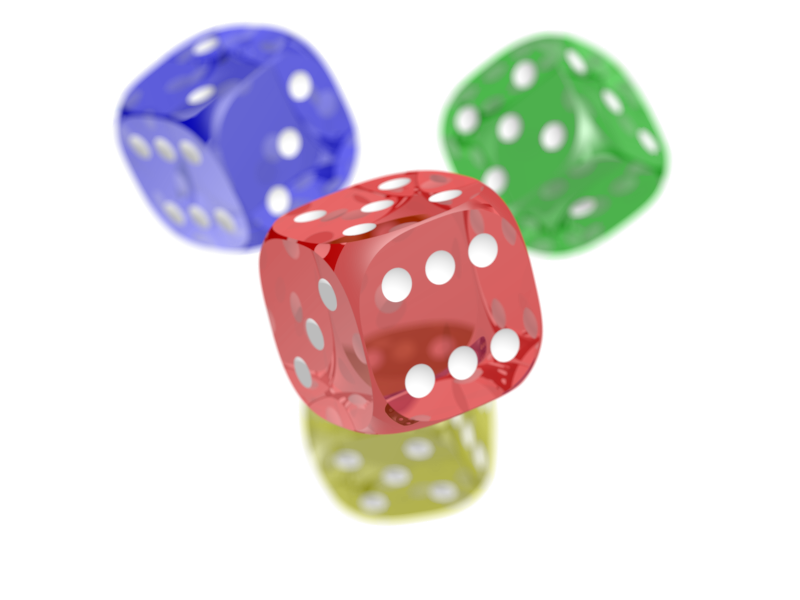

In [6]:
png = pn.panel('https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png', width=300)
png

In [10]:
column = pn.Column('# Título', pn.widgets.FloatSlider())
column.append('* Anotación 1\n* Anotación 2')
column.extend([pn.widgets.TextInput(), pn.widgets.Checkbox(name=' Activar!')])
column[3] = pn.widgets.Button(name='Ejecutar simulación')
column

Column
    [0] Markdown(str)
    [1] FloatSlider(value_throttled=0.0)
    [2] Markdown(str)
    [3] Button(name='Ejecutar simulación')
    [4] Checkbox(name=' Activar!')

In [11]:
from bokeh.plotting import figure

p1 = figure(width=300, height=300)
p1.line([1, 2, 3], [1, 2, 3])

tabs = pn.Tabs(p1)

# Add a tab
tabs.append(('Slider', pn.widgets.FloatSlider()))

# Add multiple tabs
tabs.extend([
    ('Text', pn.widgets.TextInput()),
    ('Color', pn.widgets.ColorPicker())
])

tabs

Tabs
    [0] Bokeh(Figure)
    [1] FloatSlider(value_throttled=0.0)
    [2] TextInput()
    [3] ColorPicker()

GridSpec(max_height=800, ncols=3, nrows=5, sizing_mode='stretch_both')
    [0] Spacer(background='#FF0000', sizing_mode='stretch_both')
    [1] Spacer(background='#0000FF', sizing_mode='stretch_both')
    [2] Bokeh(Figure, sizing_mode='stretch_both')
    [3] HoloViews(Curve, sizing_mode='stretch_both')
    [4] PNG(str, sizing_mode='stretch_both')
    [5] Column(sizing_mode='stretch_both')
        [0] FloatSlider(sizing_mode='stretch_width', value_throttled=0.0)
        [1] ColorPicker(sizing_mode='stretch_width')
        [2] Toggle(name='Picale!', sizing_mode='stretch_width')
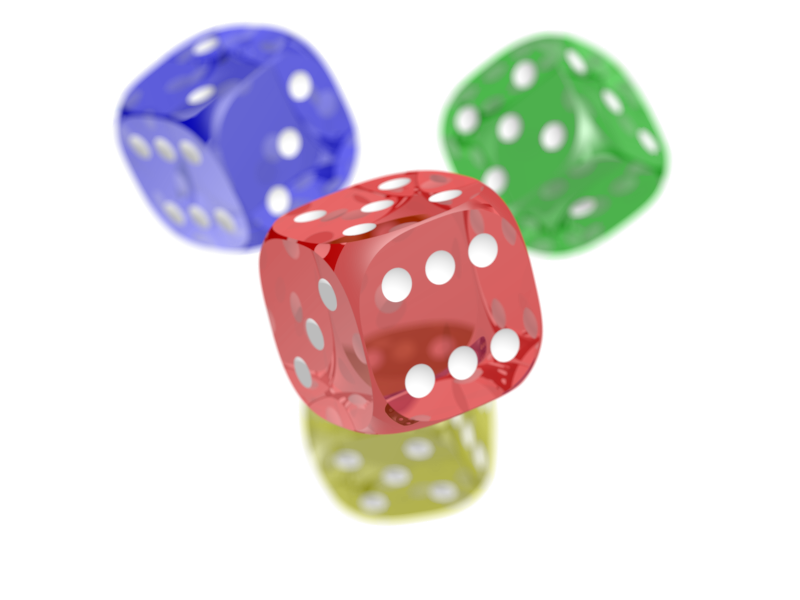

In [14]:
import holoviews as hv
import holoviews.plotting.bokeh

from bokeh.plotting import figure

fig = figure()
fig.scatter([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 2, 1, 0, -1, -2, -3])

gspec = pn.GridSpec(sizing_mode='stretch_both', max_height=800)

gspec[0, :3] = pn.Spacer(background='#FF0000')
gspec[1:3, 0] = pn.Spacer(background='#0000FF')
gspec[1:3, 1:3] = fig
gspec[3:5, 0] = hv.Curve([1, 2, 3])
gspec[3:5, 1] = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
gspec[4:5, 2] = pn.Column(
    pn.widgets.FloatSlider(),
    pn.widgets.ColorPicker(),
    pn.widgets.Toggle(name='Picale!'))

gspec

In [15]:
import pandas as pd
import plotly.express as px
pn.extension('plotly')

In [20]:
data = pd.DataFrame([
    ('Monday', 7), ('Tuesday', 4), ('Wednesday', 9), ('Thursday', 4),
    ('Friday', 4), ('Saturday', 4), ('Sunay', 4)], columns=['Day', 'Orders']
)

fig = px.line(data, x="Day", y="Orders")
fig.update_traces(mode="lines+markers", marker=dict(size=10), line=dict(width=4))
fig.layout.autosize = True

responsive = pn.pane.Plotly(fig, config={'responsive': True})

pn.Column('# A responsive plot', responsive, sizing_mode='stretch_width')

Column(sizing_mode='stretch_width')
    [0] Markdown(str, sizing_mode='stretch_width')
    [1] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')

In [2]:
import panel as pn
import numpy as np
import holoviews as hv

pn.extension()

In [15]:
bootstrap = pn.template.BootstrapTemplate(title='Bootstrap Template')

pn.config.sizing_mode = 'stretch_width'

xs = np.linspace(0, np.pi)
freq = pn.widgets.FloatSlider(name="Frequency", start=0, end=10, value=2)
phase = pn.widgets.FloatSlider(name="Phase", start=0, end=np.pi)

@pn.depends(freq=freq, phase=phase)
def sine(freq, phase):
    return hv.Curve((xs, np.sin(xs*freq+phase))).opts(
        responsive=True, min_height=400)

@pn.depends(freq=freq, phase=phase)
def cosine(freq, phase):
    return hv.Curve((xs, np.cos(xs*freq+phase))).opts(
        responsive=True, min_height=400)

bootstrap.sidebar.append(freq)
bootstrap.sidebar.append(phase)

bootstrap.main.append(
    pn.Row(
        pn.Card(hv.DynamicMap(sine), title='Sine'),
        pn.Card(hv.DynamicMap(cosine), title='Cosine')
    )
)

bootstrap.show()

Launching server at http://localhost:53089


## Construcción de un tablero 

In [16]:
import panel as pn
import plotly.express as px
pn.extension('plotly')

In [90]:
gapminder = px.data.gapminder()


ano = pn.widgets.Select(name='Año', 
                        options= gapminder.year.unique().tolist(),
                        background='#f0f0f0',
                        margin=(25, 25, 10, 25))
pais = pn.widgets.Select(name='País',
                         options= gapminder.country.unique().tolist(),
                         background='#f0f0f0',
                        margin=(10, 25, 25, 25))





@pn.depends(pais=pais)
def grafica(pais):
    datos = gapminder[gapminder.country==pais]
    return px.scatter(datos, x="year", y="gdpPercap", color="lifeExp", size="pop", size_max=60)


@pn.depends(ano=ano)
def continente(ano):
    datos = gapminder[gapminder.year==ano]
    return px.scatter(datos, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60)


gspec = pn.GridSpec(sizing_mode='stretch_both', max_height=800, background='#f0f0f0')

gspec[0, :] = pn.Row(pn.pane.Markdown(''' # Tablero \n Este tablero es una práctica ''',style={'font-family': "serif"}),
                    margin=(25, 25, 25, 25))

gspec[1:3, 0:0] = pn.Column(ano,pais,
                          background='#3f3f3f',
                           margin=(25, 25, 25, 25))

gspec[1:5, 1:3] = pn.Tabs(("Por País",grafica),("Fija continente y año",continente),
                         background='#3f3f3f',
                       margin=(25, 25, 25, 25))


gspec

GridSpec(background='#f0f0f0', max_height=800, ncols=3, nrows=5, sizing_mode='stretch_both')
    [0] Row(margin=(25, 25, 25, 25), sizing_mode='stretch_both')
        [0] Markdown(str, sizing_mode='stretch_width', style={'font-family': 'serif'})
    [1] Column(background='#3f3f3f', margin=(25, 25, 25, 25), sizing_mode='stretch_both')
        [0] Select(background='#f0f0f0', margin=(25, 25, 10, 25), name='Año', options=[1952, 1957, 1962, ...], sizing_mode='stretch_width', value=1952)
        [1] Select(background='#f0f0f0', margin=(10, 25, 25, 25), name='País', options=['Afghanistan', ...], sizing_mode='stretch_width', value='Afghanistan')
    [2] Tabs(background='#3f3f3f', margin=(25, 25, 25, 25), sizing_mode='stretch_both')
        [0] ParamFunction(function, name='Por País', sizing_mode='stretch_width')
        [1] ParamFunction(function, name='Fija continente y año', sizing_mode='stretch_width')